In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader


In [2]:
df = pd.read_csv('C:/Users/jomya/OneDrive/Documents/GoogleStock.csv')
df.head(10)

,date,high,low,open,close,volume,symbol
0,2022-06-08,116.95000,116.950000,116.95000,116.95000,4000,GOOG
1,2022-06-08,117.22950,117.229500,117.22950,117.22950,40000,GOOG
2,2022-06-08,117.28525,116.696750,116.88200,117.22350,281360,GOOG
3,2022-06-08,117.00950,116.792000,117.00950,116.85450,36100,GOOG
4,2022-06-08,116.89823,116.719775,116.86550,116.89175,46000,GOOG
5,2022-06-08,117.02100,116.807000,116.84650,116.80700,46440,GOOG
6,2022-06-08,116.90525,116.842750,116.84275,116.90525,9200,GOOG
7,2022-06-08,117.09050,116.763500,116.76350,117.02250,26000,GOOG
8,2022-06-08,117.22550,116.917500,117.14950,116.99800,24420,GOOG
9,2022-06-08,117.09100,116.997500,117.05000,117.04500,34960,GOOG


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14020 entries, 0 to 14019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    14020 non-null  object 
 1   high    14020 non-null  float64
 2   low     14020 non-null  float64
 3   open    14020 non-null  float64
 4   close   14020 non-null  float64
 5   volume  14020 non-null  int64  
 6   symbol  14020 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 766.8+ KB


Text(0.5, 1.0, 'Google Closing Price')

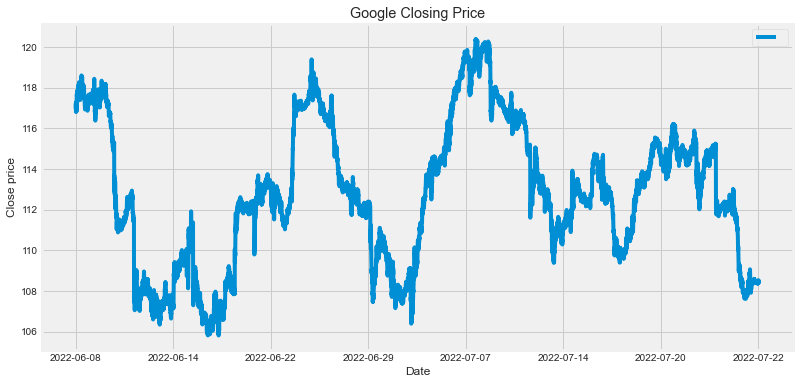

In [4]:
plt.figure(figsize=(12,6))
ax = plt.gca()
df.plot(kind='line',x='date',y='close',ax=ax, label ="")
plt.ylabel('Close price')
plt.xlabel('Date')
plt.title(f"Google Closing Price")

Text(0.5, 1.0, 'Voulme of Google stocks sold')

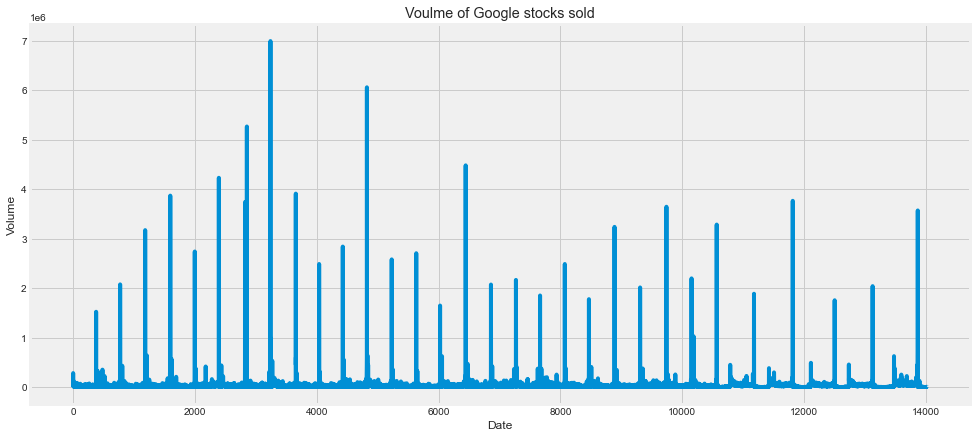

In [5]:
plt.figure(figsize=(15, 7))
df['volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title(f"Voulme of Google stocks sold")

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .60 ))

training_data_len

8412

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.76375332],
       [0.78293164],
       [0.78251994],
       ...,
       [0.1825714 ],
       [0.1825714 ],
       [0.18394373]])

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)


# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
y_train.shape

[array([0.76375332, 0.78293164, 0.78251994, 0.75720045, 0.75975641,
       0.75394116, 0.76068273, 0.76872802, 0.76704692, 0.77027189,
       0.7728107 , 0.78838665, 0.77356549, 0.76401064, 0.76265546,
       0.76546874, 0.75593104, 0.76234668, 0.75898448, 0.77850553,
       0.77434771, 0.81448357, 0.80859422, 0.81398062, 0.80626126,
       0.80547217, 0.81322583, 0.82550819, 0.81401492, 0.80755639,
       0.82013895, 0.81284844, 0.81219659, 0.80060039, 0.80080624,
       0.80663865, 0.82025903, 0.81674243, 0.81717128, 0.81178489,
       0.81693113, 0.80720473, 0.80430569, 0.81964148, 0.81569603,
       0.80001681, 0.80492324, 0.79154301, 0.79629471, 0.79511107,
       0.81188781, 0.818475  , 0.83168368, 0.82660606, 0.82801269,
       0.83688996, 0.82797873, 0.83398233, 0.8430054 , 0.83461703])]
[0.8315635989364427]

[array([0.76375332, 0.78293164, 0.78251994, 0.75720045, 0.75975641,
       0.75394116, 0.76068273, 0.76872802, 0.76704692, 0.77027189,
       0.7728107 , 0.78838665, 0.773

(8352,)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



8352/8352 [==============================] - 414s 49ms/step - loss: 6.0501e-04


In [10]:
#Create the testing data set 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#summary of model
model.summary()

# Get the root mean squared error (RMSE)
rmse_test = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse_test




176/176 [==============================] - 4s 14ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


0.243014352540492

C:\Users\jomya\AppData\Local\Temp\ipykernel_28304\3641688506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


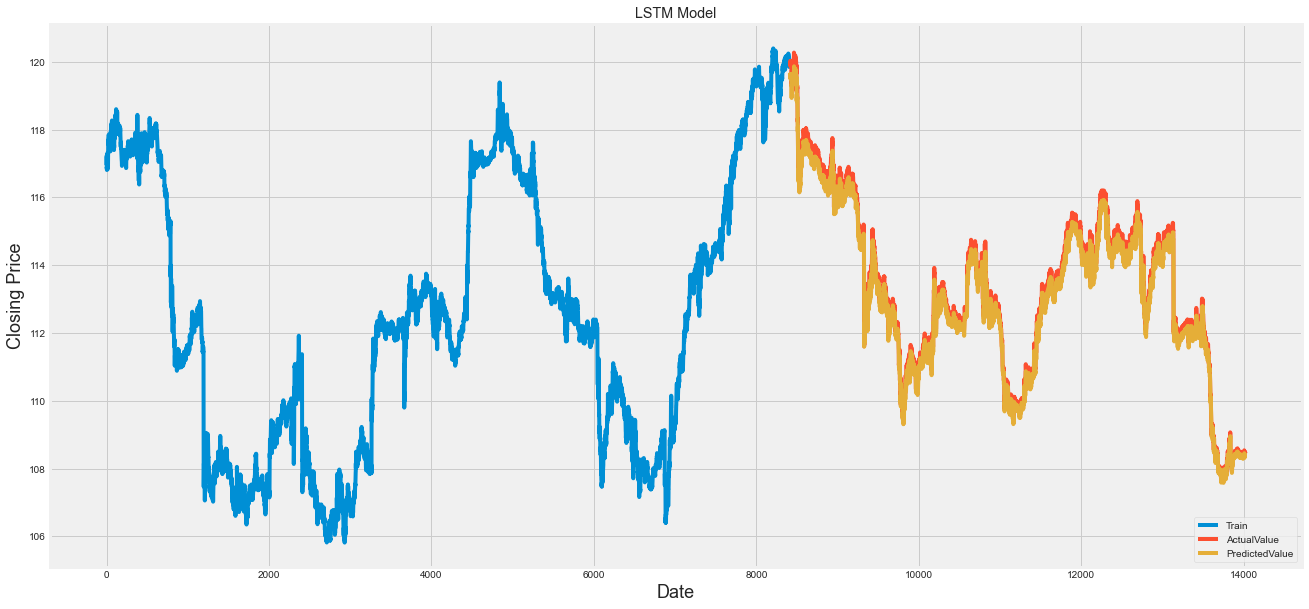

In [11]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(20,10))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'ActualValue', 'PredictedValue'], loc='lower right')
plt.show()

In [12]:
def mape(y_test, predictions):
    return np.mean(np.abs((y_test-predictions)/y_test))*100
result = mape(y_test,predictions)
print(result)
accuracy = 100 - result
print(accuracy)


0.1862429706888882
99.8137570293111
